In [ ]:
import math
import numpy as np
import copy
import matplotlib.pyplot as plt


def distance2pts(vector1, vector2, p=2):
    #Euclidian p = 2
    #Manhatten p = 1
    num = 0
    for i in range(0,len(vector1)):
        num += abs(vector1[i]-vector2[i]) ** p
    return num ** (1/p)


pointcloudsdummy = np.random.randint(0,500,3000).reshape((500,6))


def kMeans(data, k, features):
    dataset_length = len(data)
    # print("Dataset length is: ", dataset_length)

    dataConsidered = data[:,features]

    pick_centroids = np.random.randint(0,dataset_length,k)

    no_feat = len(features)

    # print("this is k: ", k)

    centroids = np.empty([k,no_feat])
  
    for i, c in enumerate(pick_centroids):
        centroids[i] = dataConsidered[c]

    clustergroup = np.zeros(dataset_length)
    clustergroup_new = np.zeros(dataset_length)
    
    round = 0
    running = 1
    while running == 1:
        # print("start while loop")
        # print("round {} centroids: ".format(round), centroids)
        old_centroids = copy.deepcopy(centroids)

        #for each point:
        for i, location in enumerate(dataConsidered):
            distance = float('inf') # our distance from each point to centroid
            #now check for each centroid
            for i2, centroid in enumerate(centroids):
                temp_dist = distance2pts(location, centroid)
                if temp_dist < distance:
                    distance = temp_dist
                    clustergroup_new[i] = i2
         
  
        #update centroids data
        #take all items in dictionary with that centroids, then calculate new center, then update centroid data
        for i, centroid in enumerate(centroids):
            temp_list = np.empty([1,no_feat])
            for i2, item in enumerate(clustergroup_new):
                if item == i:
                    temp_list = np.append(temp_list, [dataConsidered[i2]], axis=0)
            centroids[i] = temp_list.mean(axis=0)
          
        #       Ending correctly or looping

        if np.all(old_centroids == centroids) == True:
            # print("Running has been set to zero!!!!!")
            running = 0
            return clustergroup_new, centroids, dataConsidered
        else:
            clustergroup = clustergroup_new

        round += 1
        # print("this was round: ", round)


clustergroup_new, centroids, dataConsidered = kMeans(pointcloudsdummy,5, [0, 1,2,4,5])

print(dataConsidered)

In [9]:
import ClusterComparing as cc

dataload = np.loadtxt('features_norm.csv', delimiter=',')

cluster2, centroids, dataConsidered = kMeans(dataload, 5, [1,3,6])
print('k-means accuracy')
cc.cluster_accuracy(cluster2)

k-means accuracy
correct 283
incorrect 217
percentage 0.566


0.566

In [ ]:
top_accuracy = 0
top_cluster = []

for i in range(0,30):
    cluster2, centroids, dataConsidered = kMeans(dataload, 5, [1,3,6])
    percentage = cc.cluster_accuracy(cluster2)
    if percentage > top_accuracy:
        top_accuracy = percentage
        top_cluster = cluster2

print(top_accuracy)

Make 3D plot

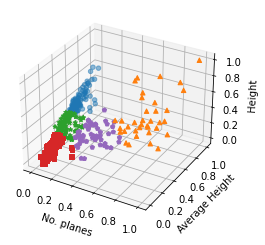

In [14]:
import matplotlib.pyplot as plt
import numpy as np

clusters = top_cluster

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# ax.set_zlim(0, 0.7)
# ax.set_ylim(0,0.5)
# ax.set_xlim(0,0.3)

for m, c, a in [('o',0, 0.5), ('^',1, 1), ('*',2, 1),('s',3, 1),('p',4, 1)]:
    xs = [dataload[i,6] for i, num_value in enumerate(dataload[:,6]) if int(clusters[i]) == int(c)]
    ys = [dataload[i,3] for i, num_value in enumerate(dataload[:,3]) if int(clusters[i]) == int(c)]
    zs = [dataload[i,1] for i, num_value in enumerate(dataload[:,1]) if int(clusters[i]) == int(c)]
    ax.scatter(xs, ys, zs, marker=m, alpha=a)

ax.set_xlabel('No. planes')
ax.set_ylabel('Average Height')
ax.set_zlabel('Height')

plt.show()


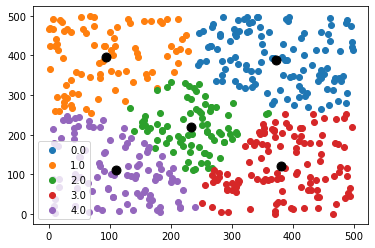

In [5]:
#Plot graphs
def plot_kmeans(clustergroup_new, centroids, dataConsidered):
    #Getting the Centroids
    u_labels = np.unique(clustergroup_new)

    # #plotting the results:
    for p in u_labels:
        plt.scatter(dataConsidered[clustergroup_new == p , 0] , dataConsidered[clustergroup_new == p , 1] , label = p)
    plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = "black")
    plt.legend()
    plt.show()

plot_kmeans(clustergroup_new, centroids, dataConsidered)


In [ ]:
# Check if clusters are correct